[22.5 25.  27.5 30.  32.5 35.  36.  36.5 37.  37.5 38.  38.5 39.  39.5
 40.  40.5 41.  41.5 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5
 47.  47.5 48.  48.5 49.  49.5 50.  51.  52.  52.5 53.  54.  55.  56.
 57.  57.5 60.  62.5 65.  70.  75.  80. ]
x:  [22.5]
y:  [14.5]
x:  [25.]
y:  [12.025]
x:  [27.5]
y:  [9.6]
x:  [30. 30. 30.]
y:  [7.    7.075 7.125]
x:  [32.5]
y:  [4.8]
x:  [35. 35. 35. 35. 35.]
y:  [2.155 2.375 2.565 2.725 2.94 ]
x:  [36. 36. 36. 36.]
y:  [1.34  1.66  1.825 2.26 ]
x:  [36.5 36.5]
y:  [0.99 1.31]
x:  [37. 37. 37. 37.]
y:  [0.69 1.04 1.23 1.65]
x:  [37.5 37.5 37.5]
y:  [0.47 0.79 1.18]
x:  [38. 38. 38. 38.]
y:  [0.295 0.585 0.755 1.13 ]
x:  [38.5 38.5]
y:  [0.185 0.415]
x:  [39. 39. 39. 39.]
y:  [0.125 0.295 0.43  0.785]
x:  [39.5 39.5]
y:  [0.075 0.205]
x:  [40. 40. 40. 40. 40.]
y:  [0.05  0.15  0.24  0.36  0.515]
x:  [40.5 40.5]
y:  [0.04  0.115]
x:  [41. 41. 41. 41.]
y:  [0.03  0.08  0.13  0.345]
x:  [41.5 41.5]
y:  [0.03  0.065]
x:  [42. 42. 42. 42.]
y:  [

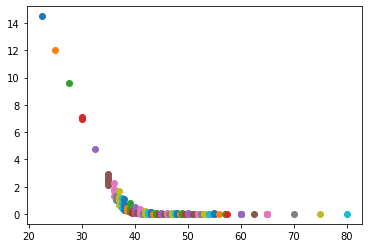

In [22]:
import yfinance as yf
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np


ticker = yf.Ticker('INTC')
opts_frames = []
dp = pd.DataFrame()

stock_price = ticker.info['regularMarketPrice']
idx = 0

for exp_date in ticker.options:
    idx += 1
    opt = ticker.option_chain(date=exp_date)
    dp = opt.calls
    dp['stock_price'] = stock_price
    dp['expirationDate'] = exp_date
    opts_frames.append(dp)

    if idx > 4:
        break
    
def generar_dataframe(lst):
    columns = ['contractSymbol', 'lastTradeDate', 'lastPrice', 'change', 'percentChange', 'volume', 'openInterest', 'impliedVolatility', 'inTheMoney', 'contractSize', 'currency', 'bid', 'ask']
    df = pd.concat(lst)
    df["call_price"] = ( df["bid"] + df["ask"] ) / 2
    df.drop(columns, inplace=True, axis=1)
    return df

#print(dp)
df = generar_dataframe(opts_frames)
# print(df)

a_df = np.unique(df['strike'], axis=0)
print(a_df)

for strike in a_df:
    temp_df = df[df["strike"] == strike] 
    x_axis = temp_df["strike"].values
    y_axis = temp_df["call_price"].values
    print("x: ", x_axis)
    print("y: ", y_axis)
    pl.scatter(x_axis, y_axis, label=f"strike={strike}")

#df = df.sort_values('expirationDate', ascending=True)
#pl.scatter(df['strike'], df['call_price'], label="<30")
#pl.scatter(df['expirationDate'], df['call_price'], label="<30")
#pl.scatter(df3['strike'], df3['call_price'], label=">30")
pl.legend()
pl.figure()
